In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")
#hallo
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data = []
for file in sorted(os.listdir('Data')):
        with open('Data/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])


In [3]:
anh = Path("Results/anhang.txt")
anh.touch()
nf = open(anh,"w")

dir = Path("Results/amplitudes.txt")
dir.touch()
countrate = open(dir,"w")
countrate.write("pressure\tg1_amplitude\tg1_amplitudeerr\tg2_amplitude\tg2_amplitudeerr\tg3_amplitude\tg3_amplitudeerr\tg4_amplitude\tg4_amplitudeerr\n")

dir2 = Path("Results/center.txt")
dir2.touch()
center = open(dir2,"w")
center.write("pressure\tg1_center\tg1_centererr\tg2_center\tg2_centererr\tg3_center\tg3_centererr\tg4_center\tg4_centererr\n")

101

#########################################################055_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 131
    # data points      = 750
    # variables        = 9
    chi-square         = 1410.48886
    reduced chi-square = 1.90349373
    Akaike info crit   = 491.713817
    Bayesian info crit = 533.294476
    R-squared          = 0.99978904
[[Variables]]
    g1_amplitude:  36609.7631 +/- 758.456292 (2.07%) (init = 1)
    g1_center:     206.172448 +/- 2.06110440 (1.00%) (init = 200)
    g1_sigma:      76.1966732 +/- 1.32126643 (1.73%) (init = 0.3)
    g2_amplitude:  35732.9466 +/- 988.414888 (2.77%) (init = 1)
    g2_center:     364.080399 +/- 0.93708313 (0.26%) (init = 350)
    g2_sigma:      48.3743854 +/- 1.06589267 (2.20%) (init = 0.3)
    g3_amplitude:  25973.6391 +/- 457.000965 (1.76%) (init = 1)
    g3_center:     519.559376 +/- 1

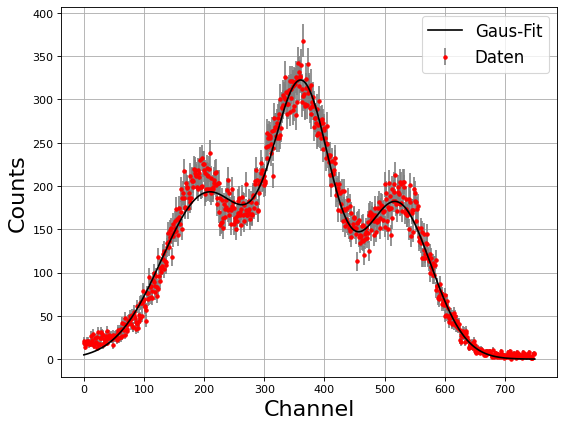

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 550
    # variables        = 3
    chi-square         = 1419.42626
    reduced chi-square = 2.59492918
    Akaike info crit   = 527.449362
    Bayesian info crit = 540.379117
    R-squared          = 0.99922436
[[Variables]]
    amplitude:  23905.4513 +/- 249.167210 (1.04%) (init = 34626)
    center:     1043.92955 +/- 0.60136770 (0.06%) (init = 1047.937)
    sigma:      57.0598117 +/- 0.45793816 (0.80%) (init = 58)
    fwhm:       134.365586 +/- 1.07836194 (0.80%) == '2.3548200*sigma'
    height:     167.138577 +/- 2.19276490 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.120


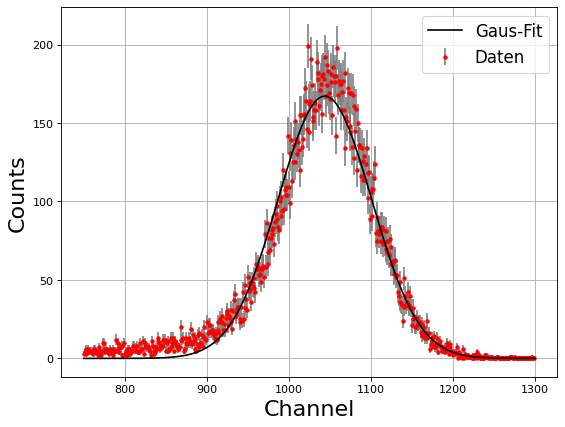

#########################################################100_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 152
    # data points      = 600
    # variables        = 9
    chi-square         = 735.081647
    reduced chi-square = 1.24379297
    Akaike info crit   = 139.831153
    Bayesian info crit = 179.403520
    R-squared          = 0.99986203
[[Variables]]
    g1_amplitude:  28277.9010 +/- 959.025942 (3.39%) (init = 1)
    g1_center:     49.0875330 +/- 1.16292519 (2.37%) (init = 75)
    g1_sigma:      55.5932621 +/- 2.05255288 (3.69%) (init = 0.3)
    g2_amplitude:  44509.6580 +/- 908.259511 (2.04%) (init = 1)
    g2_center:     215.256752 +/- 0.85133560 (0.40%) (init = 200)
    g2_sigma:      55.5451625 +/- 1.16629039 (2.10%) (init = 0.3)
    g3_amplitude:  24348.1988 +/- 400.755559 (1.65%) (init = 1)
    g3_center:     380.476527 +/- 1.

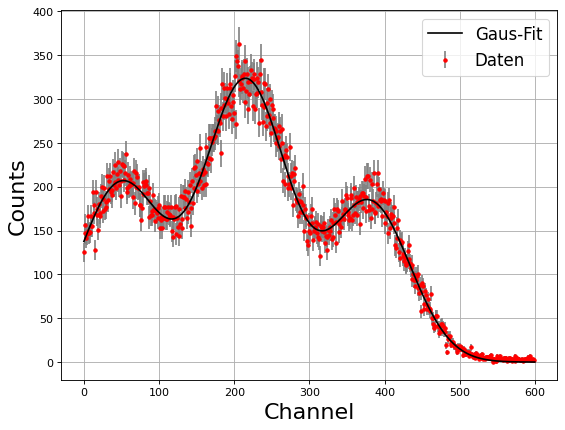

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 500
    # variables        = 3
    chi-square         = 1153.78637
    reduced chi-square = 2.32150175
    Akaike info crit   = 424.098105
    Bayesian info crit = 436.741929
    R-squared          = 0.99935180
[[Variables]]
    amplitude:  23932.9842 +/- 235.767487 (0.99%) (init = 33391.5)
    center:     896.355430 +/- 0.55691135 (0.06%) (init = 900.9541)
    sigma:      55.8600742 +/- 0.41750779 (0.75%) (init = 56.5)
    fwhm:       131.540420 +/- 0.98315571 (0.75%) == '2.3548200*sigma'
    height:     170.924939 +/- 2.10995515 (1.23%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.137


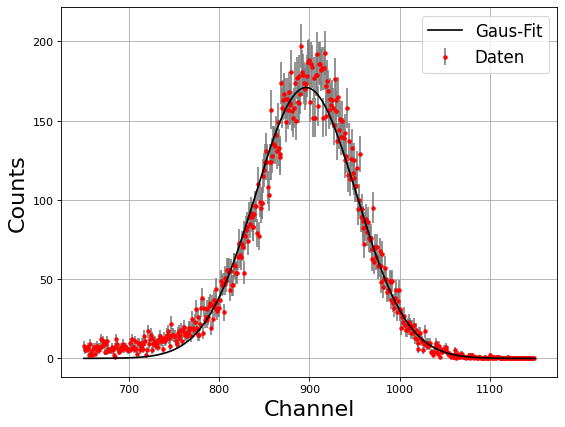

#########################################################150_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 210
    # variables        = 3
    chi-square         = 211.534930
    reduced chi-square = 1.02190788
    Akaike info crit   = 7.52934786
    Bayesian info crit = 17.5706705
    R-squared          = 0.99980201
[[Variables]]
    amplitude:  26376.4736 +/- 297.716476 (1.13%) (init = 1)
    center:     232.473123 +/- 0.88216514 (0.38%) (init = 225)
    sigma:      55.2493347 +/- 0.58761581 (1.06%) (init = 1)
    fwhm:       130.102238 +/- 1.38372946 (1.06%) == '2.3548200*sigma'
    height:     190.458240 +/- 1.57832775 (0.83%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.804
    C(amplitude, center) = -0.762
    C(amplitude, sigma)  = 0.716


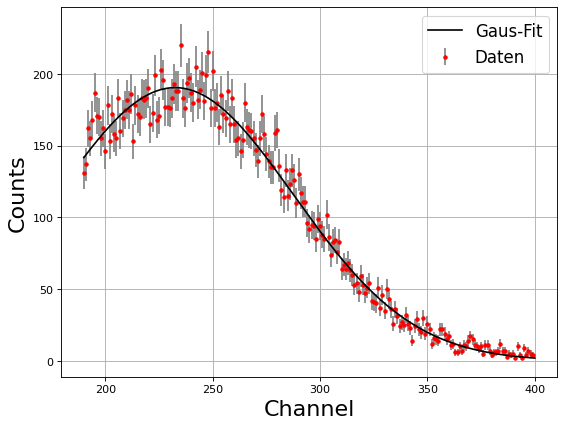

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 400
    # variables        = 3
    chi-square         = 1036.99146
    reduced chi-square = 2.61206917
    Akaike info crit   = 387.045771
    Bayesian info crit = 399.020164
    R-squared          = 0.99929754
[[Variables]]
    amplitude:  24003.6376 +/- 250.999208 (1.05%) (init = 1)
    center:     750.537572 +/- 0.59819612 (0.08%) (init = 750)
    sigma:      56.2039537 +/- 0.47240634 (0.84%) (init = 1)
    fwhm:       132.350194 +/- 1.11243191 (0.84%) == '2.3548200*sigma'
    height:     170.380654 +/- 2.25798656 (1.33%) == '0.3989423*amplitude/max(1e-15, sigma)'


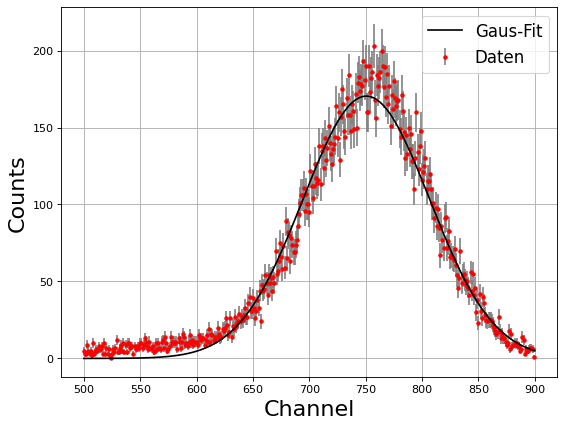

#########################################################200_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 280
    # variables        = 3
    chi-square         = 453.302368
    reduced chi-square = 1.63647064
    Akaike info crit   = 140.895538
    Bayesian info crit = 151.799907
    R-squared          = 0.99969049
[[Variables]]
    amplitude:  28696.5701 +/- 283.883600 (0.99%) (init = 1)
    center:     86.8914071 +/- 0.82878029 (0.95%) (init = 100)
    sigma:      60.0186618 +/- 0.60553241 (1.01%) (init = 1)
    fwhm:       141.333145 +/- 1.42591982 (1.01%) == '2.3548200*sigma'
    height:     190.745267 +/- 1.86914902 (0.98%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.693
    C(amplitude, center) = -0.536
    C(amplitude, sigma)  = 0.519


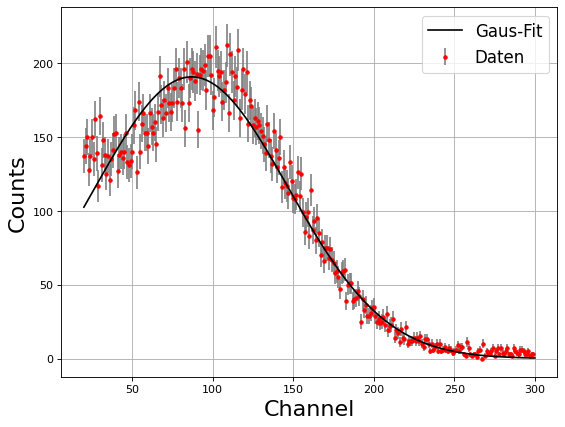

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 500
    # variables        = 3
    chi-square         = 1520.00561
    reduced chi-square = 3.05836140
    Akaike info crit   = 561.930604
    Bayesian info crit = 574.574429
    R-squared          = 0.99914533
[[Variables]]
    amplitude:  23439.9934 +/- 267.811264 (1.14%) (init = 1)
    center:     612.241095 +/- 0.62555127 (0.10%) (init = 600)
    sigma:      54.0419513 +/- 0.47141418 (0.87%) (init = 1)
    fwhm:       127.259068 +/- 1.11009555 (0.87%) == '2.3548200*sigma'
    height:     173.036033 +/- 2.48275224 (1.43%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.143


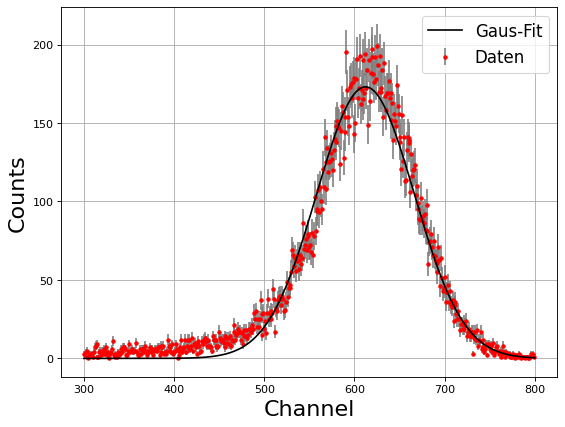

#########################################################250_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 71
    # data points      = 400
    # variables        = 3
    chi-square         = 1035.13535
    reduced chi-square = 2.60739382
    Akaike info crit   = 386.329168
    Bayesian info crit = 398.303562
    R-squared          = 0.99934612
[[Variables]]
    amplitude:  23685.6920 +/- 248.621035 (1.05%) (init = 1)
    center:     464.117842 +/- 0.56601860 (0.12%) (init = 400)
    sigma:      53.1542479 +/- 0.42367404 (0.80%) (init = 1)
    fwhm:       125.168686 +/- 0.99767609 (0.80%) == '2.3548200*sigma'
    height:     177.769883 +/- 2.33605159 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.141


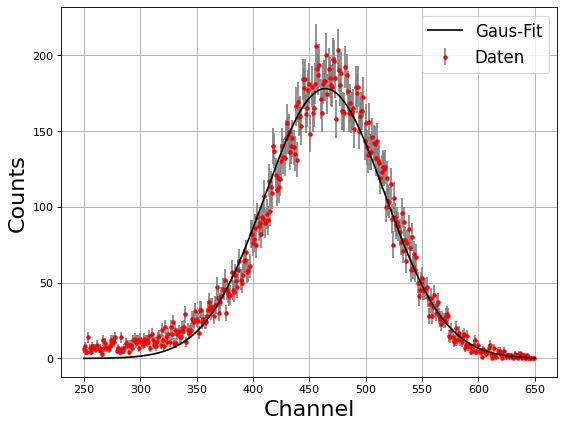

#########################################################300_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 450
    # variables        = 3
    chi-square         = 1197.26869
    reduced chi-square = 2.67845345
    Akaike info crit   = 446.347755
    Bayesian info crit = 458.675498
    R-squared          = 0.99932298
[[Variables]]
    amplitude:  23648.8653 +/- 251.757693 (1.06%) (init = 1)
    center:     332.853783 +/- 0.57026089 (0.17%) (init = 320)
    sigma:      52.8703571 +/- 0.43118202 (0.82%) (init = 1)
    fwhm:       124.500174 +/- 1.01535605 (0.82%) == '2.3548200*sigma'
    height:     178.446548 +/- 2.38761430 (1.34%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.140


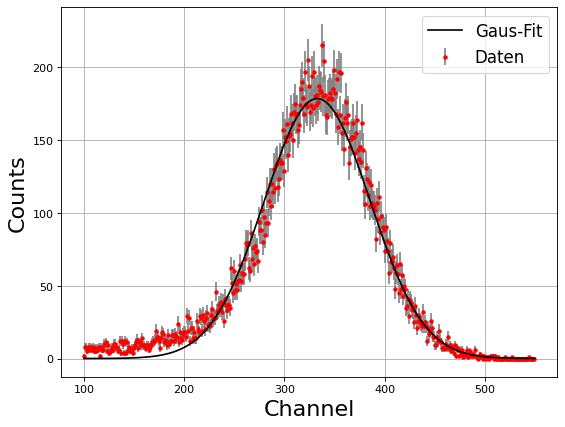

#########################################################350_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 300
    # variables        = 3
    chi-square         = 579.560090
    reduced chi-square = 1.95138077
    Akaike info crit   = 203.546063
    Bayesian info crit = 214.657410
    R-squared          = 0.99951768
[[Variables]]
    amplitude:  23919.3103 +/- 216.699903 (0.91%) (init = 1)
    center:     203.801635 +/- 0.49379954 (0.24%) (init = 200)
    sigma:      53.0717590 +/- 0.39335785 (0.74%) (init = 1)
    fwhm:       124.974439 +/- 0.92628693 (0.74%) == '2.3548200*sigma'
    height:     179.802307 +/- 2.06889811 (1.15%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.105


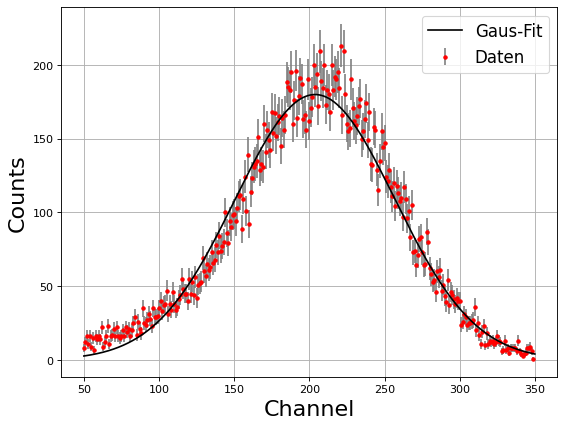

#########################################################400_Torr
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 250
    # variables        = 3
    chi-square         = 310.103545
    reduced chi-square = 1.25547994
    Akaike info crit   = 59.8613353
    Bayesian info crit = 70.4257181
    R-squared          = 0.99973428
[[Variables]]
    amplitude:  23164.4533 +/- 184.330856 (0.80%) (init = 1)
    center:     76.1990113 +/- 0.47816751 (0.63%) (init = 75)
    sigma:      49.3917671 +/- 0.37923571 (0.77%) (init = 1)
    fwhm:       116.308721 +/- 0.89303183 (0.77%) == '2.3548200*sigma'
    height:     187.101633 +/- 1.77344398 (0.95%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma)     = -0.462
    C(amplitude, sigma)  = 0.265
    C(amplitude, center) = -0.243


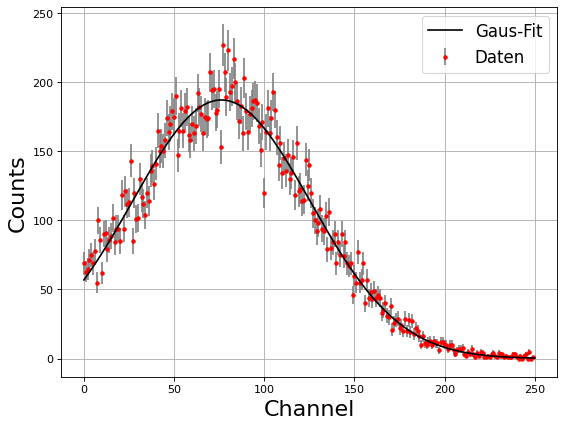

In [4]:
for i in data:

    if i[0] == '055_Torr':

        print("#########################################################"+str(i[0]))

        res = f.gaus3fit(i,0,750,200,150,250,350,300,400,520,450,600)
        torr55_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/55Torr3.pdf")
        nf.write(f.gausfit_table(torr55_3))
        plt.show()

        res = f.gaus1fit(i,750,1300,1100,900,1200)
        torr55_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/55Torr1.pdf")
        nf.write(f.gausfit_table(torr55_1))
        plt.show()



        amp1,amp2,amp3,amp4 = torr55_3.out.params["g1_amplitude"].value,torr55_3.out.params["g2_amplitude"].value,torr55_3.out.params["g3_amplitude"].value, torr55_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr55_3.out.params["g1_amplitude"].stderr,torr55_3.out.params["g2_amplitude"].stderr,torr55_3.out.params["g3_amplitude"].stderr,torr55_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr55_3.out.params["g1_center"].value,torr55_3.out.params["g2_center"].value,torr55_3.out.params["g3_center"].value,torr55_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr55_3.out.params["g1_sigma"].value,torr55_3.out.params["g2_sigma"].value,torr55_3.out.params["g3_sigma"].value,torr55_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    
    if i[0] == '0075_Torr':

        print("#########################################################"+str(i[0]))


        res = f.gaus3fit(i,0,500,75,0,150,200,175,250,350,300,400)
        torr75_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/75Torr3.pdf")
        nf.write(f.gausfit_table(torr75_3))
        plt.show()

        res = f.gaus1fit(i,650,1000,1100,900,1200)
        torr75_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/75Torr1.pdf")
        nf.write(f.gausfit_table(torr75_1))
        plt.show()

        

        amp1,amp2,amp3,amp4 = torr75_3.out.params["g1_amplitude"].value,torr75_3.out.params["g2_amplitude"].value,torr75_3.out.params["g3_amplitude"].value, torr75_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr75_3.out.params["g1_amplitude"].stderr,torr75_3.out.params["g2_amplitude"].stderr,torr75_3.out.params["g3_amplitude"].stderr,torr75_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr75_3.out.params["g1_center"].value,torr75_3.out.params["g2_center"].value,torr75_3.out.params["g3_center"].value,torr75_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr75_3.out.params["g1_sigma"].value,torr75_3.out.params["g2_sigma"].value,torr75_3.out.params["g3_sigma"].value,torr75_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "100_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus3fit(i,0,600,75,0,150,200,175,250,350,300,400)
        torr100_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/100Torr3.pdf")
        nf.write(f.gausfit_table(torr100_3))
        plt.show()

        res = f.gaus1fit(i,650,1150,900,800,1000)
        torr100_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/100Torr1.pdf")
        nf.write(f.gausfit_table(torr100_1))
        plt.show()

        amp1,amp2,amp3,amp4 = torr100_3.out.params["g1_amplitude"].value,torr100_3.out.params["g2_amplitude"].value,torr100_3.out.params["g3_amplitude"].value, torr100_1.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = torr100_3.out.params["g1_amplitude"].stderr,torr100_3.out.params["g2_amplitude"].stderr,torr100_3.out.params["g3_amplitude"].stderr,torr100_1.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = torr100_3.out.params["g1_center"].value,torr100_3.out.params["g2_center"].value,torr100_3.out.params["g3_center"].value,torr100_1.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = torr100_3.out.params["g1_sigma"].value,torr100_3.out.params["g2_sigma"].value,torr100_3.out.params["g3_sigma"].value,torr100_1.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "0125_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,150,400,200,150,250,override=True)
        torr125_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/125Torr11.pdf")
        nf.write(f.gausfit_table(torr125_11))
        plt.show()

        res = f.gaus1fit(i,400,900,700,600,800,override=True)
        torr125_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/125Torr12.pdf")
        nf.write(f.gausfit_table(torr125_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none',torr125_11.out.params["amplitude"].value, torr125_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr125_11.out.params["amplitude"].stderr,torr125_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr125_11.out.params["center"].value,torr125_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr125_11.out.params["sigma"].value,torr125_12.out.params["sigma"].value
        
        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "150_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,190,400,225,200,250,override=True)
        torr150_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/150Torr11.pdf")
        nf.write(f.gausfit_table(torr150_11))
        plt.show()

        res = f.gaus1fit(i,500,900,750,700,800,override=True)
        torr150_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/150Torr12.pdf")
        nf.write(f.gausfit_table(torr150_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none',torr150_11.out.params["amplitude"].value, torr150_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr150_11.out.params["amplitude"].stderr,torr150_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr150_11.out.params["center"].value,torr150_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr150_11.out.params["sigma"].value,torr150_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")



    if i[0] == "0175_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,25,300,100,50,150,override=True)
        torr175_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/175Torr11.pdf")
        nf.write(f.gausfit_table(torr175_11))
        plt.show()

        res = f.gaus1fit(i,300,750,550,500,600,override=True)
        torr175_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/175Torr12.pdf")
        nf.write(f.gausfit_table(torr175_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none',torr175_11.out.params["amplitude"].value, torr175_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr175_11.out.params["amplitude"].stderr,torr175_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr175_11.out.params["center"].value,torr175_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr175_11.out.params["sigma"].value,torr175_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")



    if i[0] == "200_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,20,300,100,50,150,override=True)
        torr200_11 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/200Torr11.pdf")
        nf.write(f.gausfit_table(torr200_11))
        plt.show()

        res = f.gaus1fit(i,300,800,600,550,650,override=True)
        torr200_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/200Torr12.pdf")
        nf.write(f.gausfit_table(torr200_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none',torr200_11.out.params["amplitude"].value, torr200_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none',torr200_11.out.params["amplitude"].stderr,torr200_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none',torr200_11.out.params["center"].value,torr200_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none',torr200_11.out.params["sigma"].value,torr200_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "0225_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,200,600,400,350,550,override=True)
        torr225_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/225Torr12.pdf")
        nf.write(f.gausfit_table(torr225_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr225_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr225_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr225_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr225_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

    if i[0] == "250_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,250,650,400,350,550,override=True)
        torr250_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/250Torr12.pdf")
        nf.write(f.gausfit_table(torr250_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr250_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr250_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr250_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr250_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0]== "0275_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,100,450,300,250,350,override=True)
        torr275_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/275Torr12.pdf")
        nf.write(f.gausfit_table(torr275_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr275_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr275_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr275_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr275_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "300_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,100,550,320,270,370,override=True)
        torr300_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/300Torr12.pdf")
        nf.write(f.gausfit_table(torr300_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr300_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr300_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr300_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr300_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "0325_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,50,350,200,150,250,override=True)
        torr325_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/325Torr12.pdf")
        nf.write(f.gausfit_table(torr325_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr325_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr325_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr325_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr325_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "350_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,50,350,200,150,250,override=True)
        torr350_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/350Torr12.pdf")
        nf.write(f.gausfit_table(torr350_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr350_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr350_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr350_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr350_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "0375_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,0,250,75,25,125,override=True)
        torr375_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/375Torr12.pdf")
        nf.write(f.gausfit_table(torr375_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr375_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr375_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr375_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr375_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")


    if i[0] == "400_Torr":

        print("#########################################################"+str(i[0]))


        res = f.gaus1fit(i,0,250,75,25,125,override=True)
        torr400_12 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/400Torr12.pdf")
        nf.write(f.gausfit_table(torr400_12))
        plt.show()

        amp1,amp2,amp3,amp4 = 'none','none', 'none', torr400_12.out.params["amplitude"].value
        amperr1,amperr2,amperr3,amperr4 = 'none','none','none',torr400_12.out.params["amplitude"].stderr
       
        center1,center2,center3,center4 = 'none','none','none',torr400_12.out.params["center"].value
        centererr1,centererr2,centererr3,centererr4 = 'none','none','none',torr400_12.out.params["sigma"].value

        center.write(str(i[0].split("_")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")
        countrate.write(str(i[0].split("_")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")



nf.close()
countrate.close()
center.close()